### Random Sample imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values


when should it be used ?
it assume the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic (3).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df.shape

(891, 3)

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #it wil have the random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index  in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [9]:
median=df.Age.median()

In [10]:
median

28.0

In [11]:
impute_nan(df,'Age',median)

In [12]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


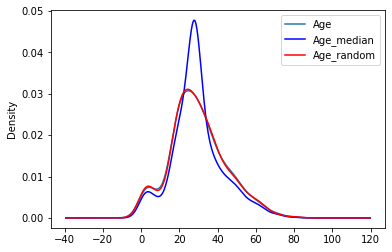

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='b')
df['Age_random'].plot(kind='kde',ax=ax,color='red')

line,lables=ax.get_legend_handles_labels()
ax.legend(line,lables,loc='best')

## advantage and Disadvantages
### Advantages
1. easy to implement
2. the variance get campture properly/there is no distortion in variance
### Diadvantage
1.in every situation randomness won't work

### 3. capturing NAN values with a new features
it works well if the data are not missing completely at random

In [14]:
df=pd.read_csv('titanic (3).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [16]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [17]:
df.Age.median()

28.0

In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)


In [19]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages
1. easy to implement
2. it captures the importance of missing values
## Disadvantages
1. creating additional features(curse of dimensionality)

## 4.End of Distribution imputation

In [21]:
df=pd.read_csv('titanic (3).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

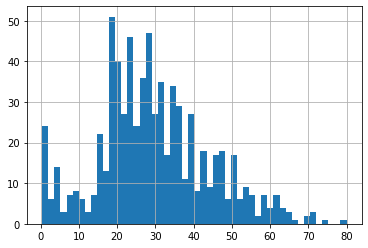

In [22]:
df.Age.hist(bins=50)

In [26]:
#extreme value
extreme=df.Age.mean()+3*df.Age.std()

<AxesSubplot:xlabel='Age'>

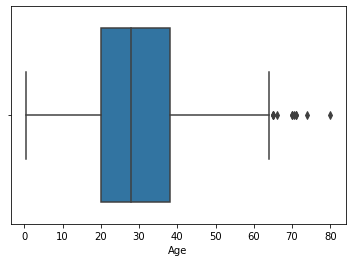

In [27]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [28]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [29]:
median=df.Age.median()

In [30]:
impute_nan(df,'Age',median,extreme)

In [32]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [37]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

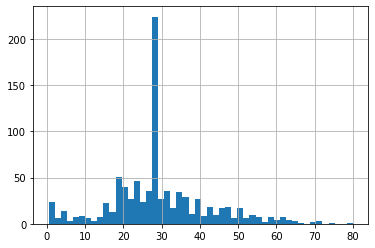

In [39]:
df['Age'].hist(bins=50)

<AxesSubplot:>

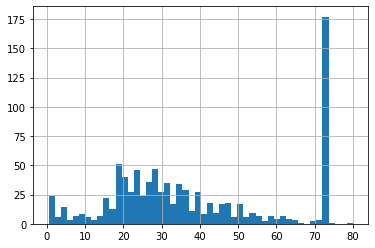

In [40]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

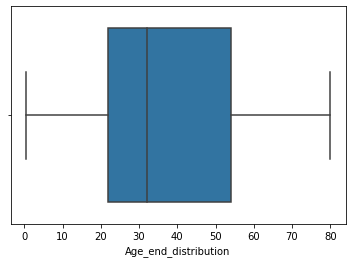

In [42]:
import seaborn as sns
sns.boxplot('Age_end_distribution',data=df)

In [ ]:
## advantage 
1. easy to implement
2. capture the importance of missingness if there is one
## Disadvantages
1. distorts the original distribution of the variable
2. if missingness is not important ,it may mask the predictive power of the original variable by distoring its distribution
3. if the number of NA is big.it will mask true outliers in the distribution
4. if the number of Na is small the replaced NA may be considered an outlier an outlier and pre-processed in a subsequent feature engineering